# Chris Inspecting

This is where Chris will be conducing any analysis to build off of Alex's work. 

Use this notebook to quickly checkout the wave plot and mel spectogram of downloaded samples.  
Add your cells after the **Explore samples below:** cell. The cells before the **Explore samples below:** cell only need to be run when opening the notebook.  
!!!Changes to this notebook will not be tracked.!!!

## Instructions
display sample metadata with the display_sample_metadata function by passing the sample id.  
Load a sample with the `load_audio_sample` function by passing the sample id as a parameter.  
Pass the returned sample into the show_amplitude_wave_plot function to view the waveplot or the show_mel_spectogram function to view the mel spectogram of the sample

## Example:
```Python
#display metadata
display_sample_metadata(123456789)
#get sample as time series
sample, _ = load_audio_sample(123456789)
'''
New cell >
'''
show_amplitude_wave_plot(sample)
'''
New cell > 
'''
show_mel_spectogram(sample)
```

In [50]:
import librosa #reads audio files
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import pandas as pd
import math
import IPython.display as ipd
import os
import json
#from varname import varname

main_sample_rate = 44100 # 44.1 kHz

samples_metadata = None # dict for species sample info
species_info_df = None # dict with species info

working_dir = os.path.abspath('')

raw_sample_dir = os.path.join(working_dir, 'dataset', 'raw') #path pointing to samples
samples_metadata_file_path = os.path.join(working_dir, 'dataset', 'data_dictionary', 'samples_metadata.json')
species_info_path = os.path.join(working_dir, 'dataset', 'data_dictionary', 'species_info.csv')

In [2]:
def get_sample_metadata():
    '''
    loads the file that holds information on the downloaded samples and the relevant species
    '''
    with open(samples_metadata_file_path) as f:
        samples_metadata = json.load(f)
    return samples_metadata

In [3]:
def get_species_info():
    '''
    loads the file that holds information on all species
    '''
    species_info_df = pd.read_csv(species_info_path).set_index('species_key')
    return species_info_df

In [4]:
def display_sample_metadata(sample_id):
    '''
    displays the meta data + some additional info on the species in the sample. Takes the sample id as a parameter 
    '''
    if samples_metadata is None:
        raise Exception("sample_meta_data has not been loaded yet. Please run load_sample_meta_data() before this function")
    sample_info = samples_metadata.get(str(sample_id), None)
    if sample_info is None:
        raise Exception("sample with id '{}' was not found in sample_metadata".format(sample_id))
    print('-' * 90)
    print(f"Sample bgifID: {sample_info['gbifID']:>10}")
    print(f"url: {sample_info['recording_link']}")
    print(f"rec time (sec): {sample_info['recording_time_sec']}")
    print(f"rec date: {sample_info['date']}")
    print()
    print(f"decimal latitude: {sample_info['decimal_latitude']}")
    print(f"decimal longitude: {sample_info['decimal_longitude']}")
    main_species_key = sample_info['forefront_bird_key']
    print()
    print(f"main species key: {main_species_key}".format())
    print(f"main scientific name: {species_info_df.at[main_species_key, 'scientific_name']}")
    print(f"main common name: {species_info_df.at[main_species_key, 'common_name']}")
    print()
    if sample_info['behavior']:
        print("Noted behavior in this sample:")
        for index, behavior in enumerate(sample_info['behavior']):
            print(f"\t{str(index)+')'} {behavior}")
    else:
        print("Noted behavior in this sample: None")
    if sample_info['background_birds_keys']:
        print("Background bird's species keys and info:")
        print(f"\t{'':3} {'key':^10} | {'scientific name':30} | {'common_name':30}")
        print(f"\t{'-'*15:^15}┼{'-'*32:32}┼{'-'*30:30}")
        for index, key in enumerate(sample_info['background_birds_keys']):
            print(f"\t{str(index)+')':3} {key:10} | {species_info_df.at[key, 'scientific_name']:30} | {species_info_df.at[key, 'common_name']:30}")
    else:
        print("Background bird's species keys: None")
    print('-' * 90)

In [5]:
def load_audio_sample(sample_id):
    '''
    loads an audio sample by it's id (file name). Returns the audio and the the sample rate
    '''
    audio_file_path = os.path.join(raw_sample_dir, str(sample_id) + '.mp3')
    if not os.path.isfile(audio_file_path): #check if file exists
        raise Exception(f"Sample with id '{sample_id}' does not exist! Available files can be found in the {raw_sample_dir} directory")
    #sample audio at 44.1 khz and get the time series as a numpy array
    time_series, sample_rate = librosa.load(audio_file_path, sr = main_sample_rate)
    #trim empty start and end padding from time series
    time_series, _ = librosa.effects.trim(time_series)

    return time_series, sample_rate

In [6]:
def show_amplitude_wave_plot(sample_time_series):
    '''
    plots the amplitude vs time of the sample 
    '''
    #sample_name = varname(sample_time_series)
    librosa.display.waveplot(sample_time_series, sr=main_sample_rate, x_axis = 's')
    plt.ylabel('Decibels [db]')
    plt.title('Waveplot for Invoked Sample')

In [7]:
def show_mel_spectogram(sample_time_series):
    '''
    plots the melspectogram of the sample
    '''
    S = librosa.feature.melspectrogram(y=sample_time_series, sr=main_sample_rate, n_mels=128, fmax=10000, center = False)
    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=main_sample_rate,
                            fmax=10000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [8]:
def available_audio():
    '''
    Outputs a list of available audio files in a user's raw folder
    '''
    listed_files = os.listdir(raw_sample_dir) #grabs the list of files from raw
    file_names = [] #empty list for appropriate file name outputs

    for _, file_name in enumerate(listed_files):
        file_name = file_name.replace('.mp3', '')
        file_names.append(file_name)

    return file_names

In [9]:
samples_metadata = get_sample_metadata()
species_info_df = get_species_info()
raw_names = available_audio()

## Metadata Exploration

In [10]:
species_info_df.columns

Index(['common_name', 'scientific_name', 'genus_key', 'forefront_recordings',
       'background_recordings'],
      dtype='object')

## Explore samples

### Sample 1

In [11]:
display_sample_metadata(raw_names[0])

------------------------------------------------------------------------------------------
Sample bgifID: 2243804495
url: https://www.xeno-canto.org/sounds/uploaded/ZNCDXTUOFL/Bonasia_bonasia_Bialowieza_Poland_Jarek_Matusiak_20091205.mp3
rec time (sec): 14
rec date: 2009-12-05

decimal latitude: 52.7001
decimal longitude: 23.8501

main species key: 2473663
main scientific name: tetrastes bonasia
main common name: hazel grouse

Noted behavior in this sample:
	0) call
Background bird's species keys: None
------------------------------------------------------------------------------------------


In [12]:
sample1, _ = load_audio_sample(raw_names[0])

In [45]:
def plot_hists(dcolx1,dcolx2,suptitle,xlabel1,ylabel1,title1,xlabel2,ylabel2,title2):
    fig, axs = plt.subplots(figsize = (20,10), nrows = 1,ncols = 2)
    fig.suptitle(suptitle, size = 30)
    
    axs[0].hist(dcolx1,bins = 50)
    axs[0].set_title(title1, size = 25)
    axs[0].set_xlabel(xlabel1, size = 25)
    axs[0].set_ylabel(ylabel1, size = 25)
    
    axs[1].hist(dcolx2, bins = 50)
    axs[1].set_title(title2, size = 25)
    axs[1].set_xlabel(xlabel2, size = 25)
    axs[1].set_ylabel(ylabel2, size = 25)

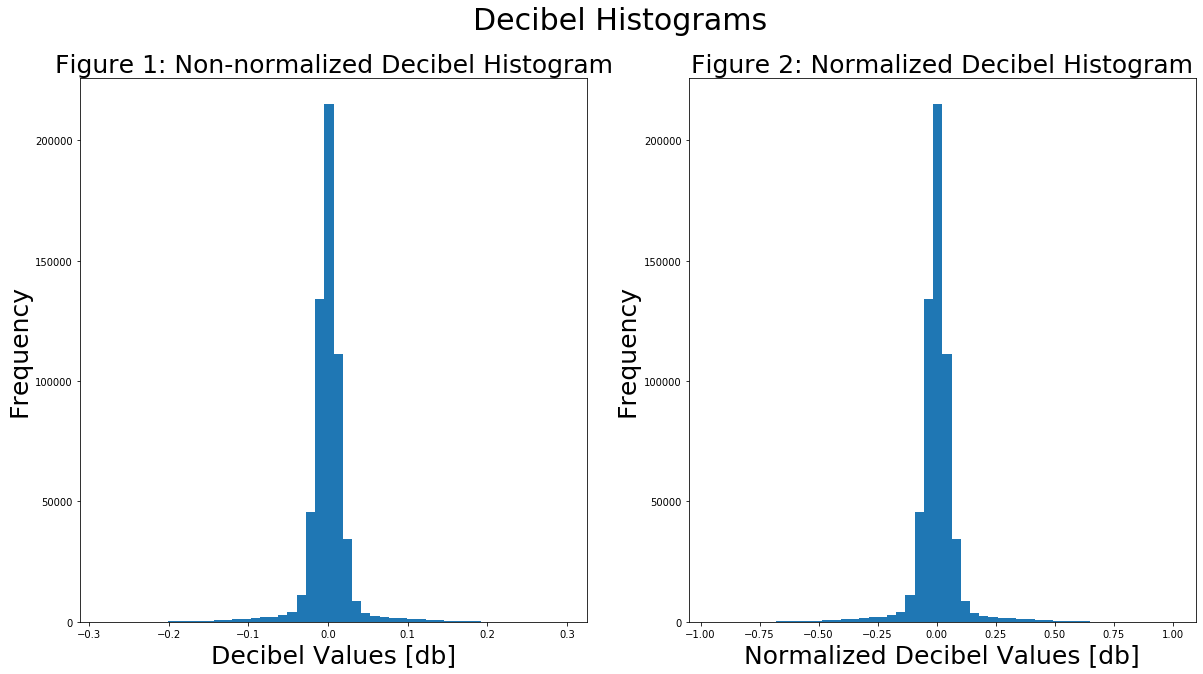

In [46]:
xdcol1 = sample1_df['decibels']

xdcol2 = sample1_df['decibel_percentage']

bigtitle = 'Decibel Histograms'
leftx = 'Decibel Values [db]'
lefty = 'Frequency'
lefttitle = 'Figure 1: Non-normalized Decibel Histogram'
rightx = 'Normalized Decibel Values [db]'
righty = 'Frequency'
righttitle = 'Figure 2: Normalized Decibel Histogram'

plot_hists(xdcol1,xdcol2,bigtitle,leftx,lefty,lefttitle,rightx,righty,righttitle)

In [23]:
sample1_df = pd.DataFrame(sample1)
sample1_df.rename(columns = {0:'decibels'}, inplace = True)

In [28]:
sample1_df['decibel_percentage'] = sample1_df['decibels']/(max(sample1_df['decibels']))

In [29]:
sample1_df

,decibels,decibel_percentage
0,-0.000007,-0.000023
1,-0.000004,-0.000013
2,0.000015,0.000050
3,0.000029,0.000098
4,-0.000013,-0.000044
...,...,...
594427,-0.000018,-0.000060
594428,0.000007,0.000025
594429,0.000030,0.000100
594430,0.000018,0.000062


In [39]:
cut_decibels_arr = []

for decibel_part_index in range(len(sample1_df['decibel_percentage'])):
    if abs(sample1_df.loc[decibel_part_index, 'decibel_percentage']) >= 0.1:
        for i in range(11):
            #if sample1_df.loc[decibel_part_index, 'decibel_percentage'] not in cut_decibels arr:
            #cut_decibels_arr.append(sample1_df.loc[decibel_part_index - i, 'decibel_percentage']) #creates and adds the lower-bound buffer

            if sample1_df.loc[decibel_part_index, 'decibel_percentage'] not in cut_decibels_arr:
                cut_decibals_arr.append(sample1_df.loc[decibel_part_index + i, 'decibel_percentage']) #creates and adds the upper-bound buffer 
            

48
55949
55950
55951
55952
55953
55954
55955
55956
55957
55958
55959
55960
55961
55962
55963
55964
55965
55966
55967
55968
55969
55970
55971
55972
55973
55974
55975
55976
55977
55978
55979
55980
55981
55982
55983
55984
55985
55986
55987
55988
55989
55990
55991
55992
55993
55994
55995
55996
55997
55998
55999
56000
56001
56002
56003
56004
56005
56006
56007
56008
56009
56010
56011
56012
56013
56014
56015
56016
56017
56018
56019
56020
56021
56022
56023
56024
56025
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
56036
56037
56038
56039
56040
56041
56042
56043
56044
56045
56046
56047
56048
56049
56050
56051
56052
56053
56054
56055
56056
56057
56058
56059
56060
56061
56062
56063
56064
56065
56066
56067
56068
56069
56070
56071
56072
56073
56074
56075
56076
56077
56078
56079
56080
56081
56082
56083
56084
56085
56086
56087
56088
56089
56090
56091
56092
56093
56094
56095
56096
56097
56098
56099
56100
56101
56102
56103
56104
56105
56106
56107
56108
56109
56110
56111
56112
56113
56114
5

KeyboardInterrupt: 

In [56]:
def plot_waveplots(sample_time_series_1,sample_time_series_2,suptitle,xlabel1,ylabel1,title1,xlabel2,ylabel2,title2):
    fig, axs = plt.subplots(figsize = (20,10), nrows = 1,ncols = 2)
    fig.suptitle(suptitle, size = 30)
    
    librosa.display.waveplot(sample_time_series_1, sr=main_sample_rate, x_axis = 's', ax = axs[0])
    axs[0].set_title(title1, size = 25)
    axs[0].set_xlabel(xlabel1, size = 25)
    axs[0].set_ylabel(ylabel1, size = 25)
    
    librosa.display.waveplot(sample_time_series_2, sr=main_sample_rate, x_axis = 's', ax = axs[1])
    axs[1].set_title(title2, size = 25)
    axs[1].set_xlabel(xlabel2, size = 25)
    axs[1].set_ylabel(ylabel2, size = 25)

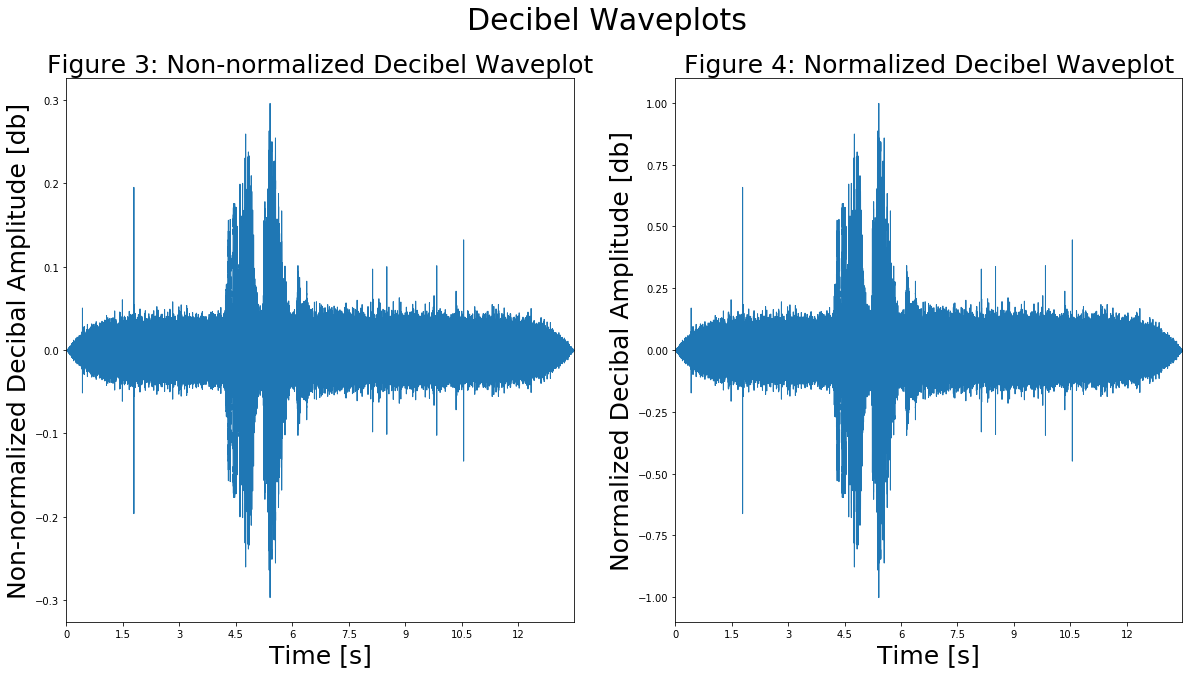

In [58]:
sample_time_1 = sample1

sample_time_2 = adjusted_sample1

bigtitle = 'Decibel Waveplots'
leftx = 'Time [s]'
lefty = 'Non-normalized Decibal Amplitude [db]'
lefttitle = 'Figure 3: Non-normalized Decibel Waveplot'
rightx = 'Time [s]'
righty = 'Normalized Decibal Amplitude [db]'
righttitle = 'Figure 4: Normalized Decibel Waveplot'

plot_waveplots(sample_time_1,sample_time_2,bigtitle,leftx,lefty,lefttitle,rightx,righty,righttitle)

### Sample 2

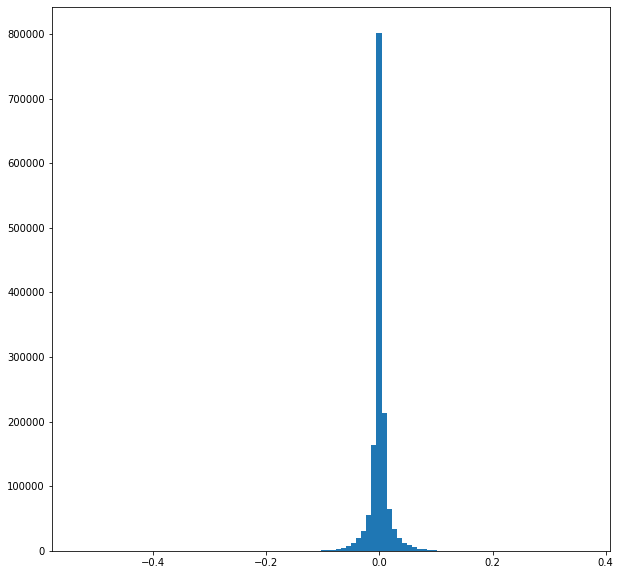

In [34]:
sample2, _ = load_audio_sample(raw_names[1])
plt.figure(figsize = (10,10))
plt.hist(sample2, bins = 100);